# 1. Import Library and Dataset

In [3]:
# import tensorflow
import tensorflow as tf


In [2]:
# print tensorflow version
print(tf.__version__)

2.15.0


In [ ]:
#Menggunakan perintah link dibawah untuk mendapatkan file zip dataser
https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip

In [6]:
import zipfile,os
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('rps')
zip_ref.close()

In [5]:
!pip install split_folders


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# 2. Split Data Training dan Data Validation

In [7]:
import splitfolders
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

splitfolders.ratio('rps/rockpaperscissors/rps-cv-images', 'rps/rockpaperscissors/data', seed=1, ratio=(.6, .4))
base_dir = 'rps/rockpaperscissors/data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
os.listdir('rps/rockpaperscissors/data/train')
os.listdir('rps/rockpaperscissors/data/val')

['paper', 'rock', 'scissors']

In [8]:
train_rock_dir = os.path.join(train_dir, 'train')
train_scissors_dir = os.path.join(train_dir, 'scissors')
train_paper_dir = os.path.join(train_dir, 'paper')
 
validation_crock_dir = os.path.join(validation_dir, 'rock')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')
validation_paper_dir = os.path.join(validation_dir, 'paper')

In [9]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
  rescale=1./255, 
  shear_range=0.1, 
  zoom_range=0.1, 
  horizontal_flip=True) 

test_datagen = ImageDataGenerator(
  rescale=1./255, 
  shear_range=0.2, 
  zoom_range=0.2,
  horizontal_flip=True) 

In [10]:
train_generator = train_datagen.flow_from_directory(
  train_dir, 
  target_size=(224, 224),
  batch_size=32, 
  color_mode='rgb', 
  class_mode='categorical',
  shuffle = True, 
  seed=42) 

validation_generator = test_datagen.flow_from_directory(
  validation_dir,
  target_size=(224, 224),
  batch_size=32,
  color_mode='rgb',
  class_mode='categorical',
  shuffle = True,
  seed=42)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [11]:
sample_train_images, _ = next(train_generator)
sample_val_images, _ = next(validation_generator)

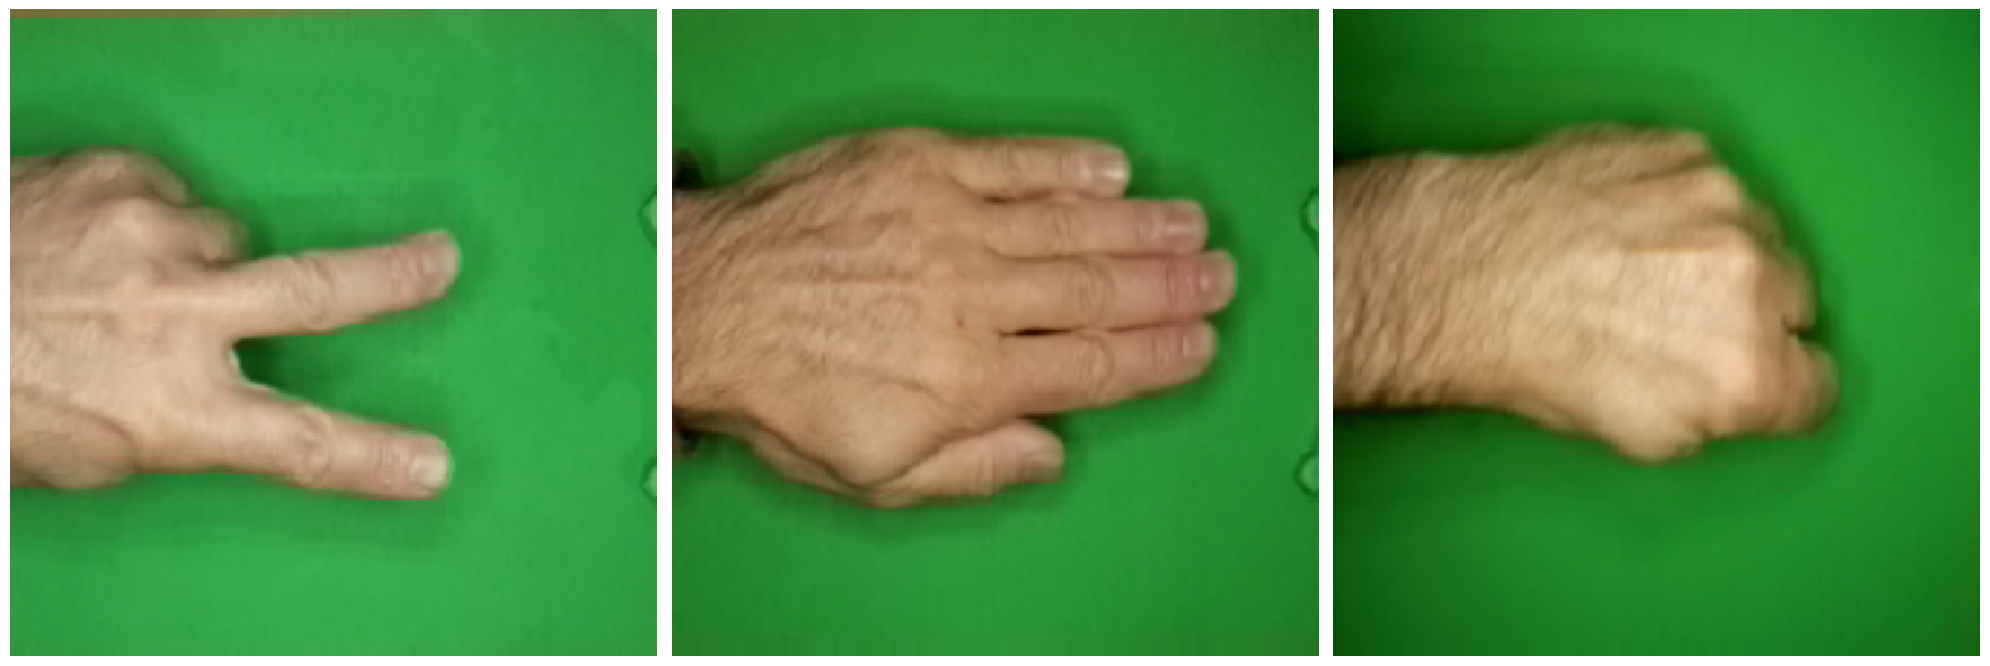

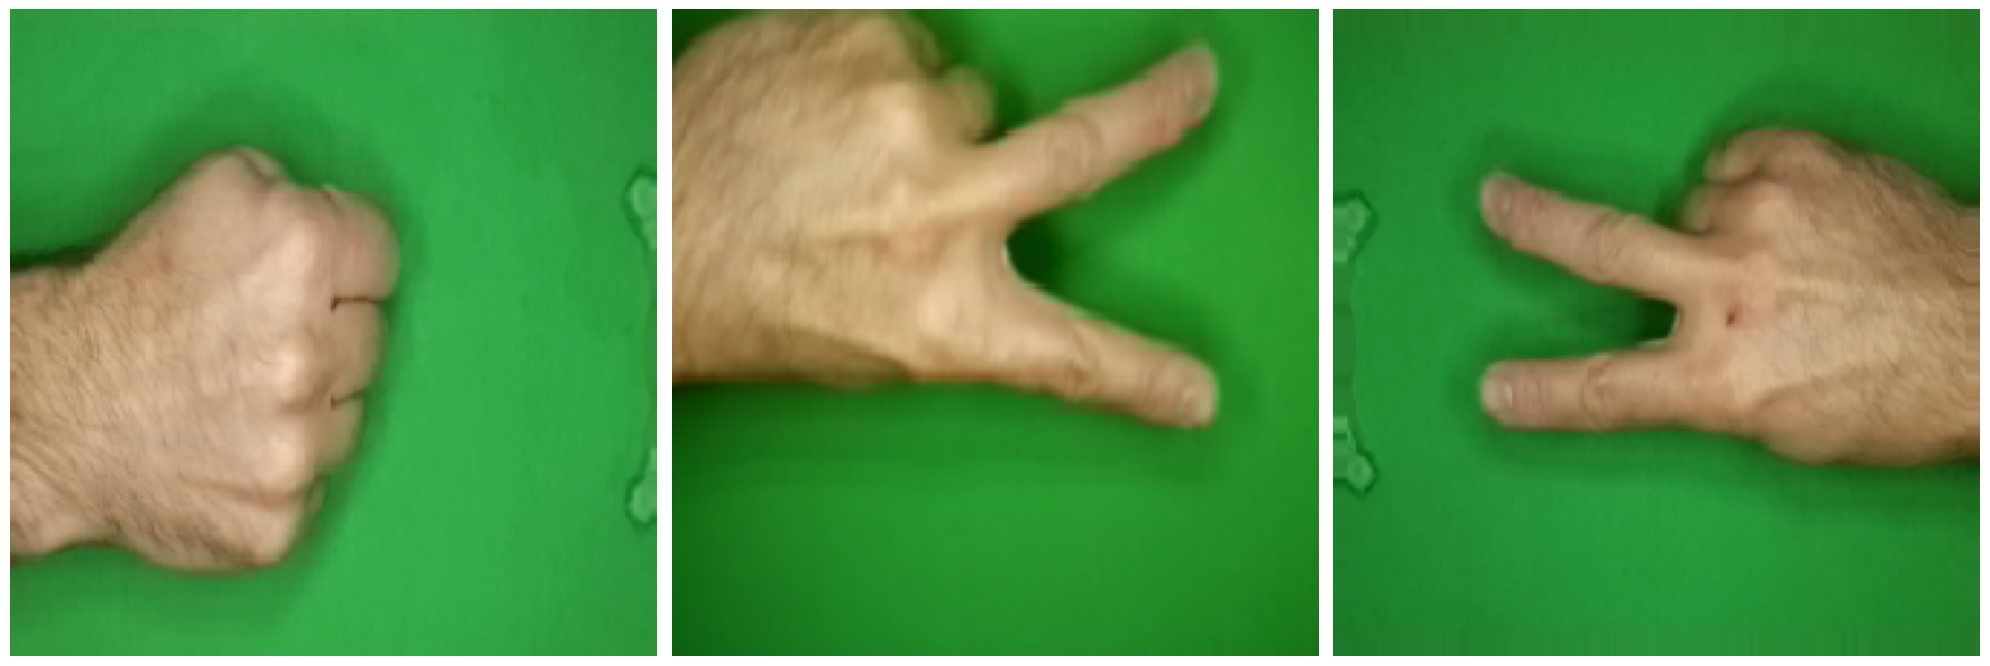

In [12]:
import matplotlib.pyplot as plt
# Sebuah fungsi untuk mengupload images 
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 3, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


plotImages(sample_train_images[:3])
plotImages(sample_val_images[:3])

# 3. Melatih Model Convolutional Neural Network dengan library Tensorflow

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)      

In [16]:
# Calculating the total number of hidden nodes in the neural network
conv2d = 32
conv2d_1 = 64
conv2d_2 = 128 
conv2d_3 = 128 
dense1 = 512
output_layer = 3  # Including the output layer for completeness

total_hidden_nodes =(conv2d + conv2d_1 + conv2d_2+ conv2d_3 + dense1 + 
                      output_layer)
total_hidden_nodes

867

In [14]:
# Menampilkan jumlah total bobot
total_weights = sum([var.numpy().flatten().shape[0] for var in model.trainable_variables])

print("Jumlah Total Bobot pada Model:", total_weights)

Jumlah Total Bobot pada Model: 9680067


#4. Kompilasi Model

In [15]:
num_output_features = model.layers[-1].output_shape[1]
print(f"jumlah features : {num_output_features}")

jumlah features : 3


In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(), # Menggunakan Optimizer dari library adam
              metrics=['accuracy'])

In [17]:
logModel = model.fit(train_generator, 
          steps_per_epoch=25, 
          epochs=10, # Mengatur Epochs sebanyak 10 
          validation_data=validation_generator,
          validation_steps=5, 
          verbose=1)

Epoch 1/10
25/25 [==============================] - 21s 860ms/step - loss: 0.1012 - accuracy: 0.9688 - val_loss: 0.0979 - val_accuracy: 0.9750
Epoch 2/10
25/25 [==============================] - 21s 824ms/step - loss: 0.0657 - accuracy: 0.9800 - val_loss: 0.1191 - val_accuracy: 0.9563
Epoch 3/10
25/25 [==============================] - 20s 804ms/step - loss: 0.0443 - accuracy: 0.9812 - val_loss: 0.1537 - val_accuracy: 0.9563
Epoch 4/10
25/25 [==============================] - 20s 814ms/step - loss: 0.0445 - accuracy: 0.9875 - val_loss: 0.1205 - val_accuracy: 0.9500
Epoch 5/10
25/25 [==============================] - 20s 808ms/step - loss: 0.0701 - accuracy: 0.9750 - val_loss: 0.1819 - val_accuracy: 0.9500
Epoch 6/10
25/25 [==============================] - 21s 844ms/step - loss: 0.0390 - accuracy: 0.9875 - val_loss: 0.1259 - val_accuracy: 0.9500
Epoch 7/10
25/25 [==============================] - 21s 852ms/step - loss: 0.0346 - accuracy: 0.9912 - val_loss: 0.1720 - val_accuracy: 0.9625

In [15]:
# Save the model to a file
model.save('batu_gunting_kertas.h5')
# Load the saved model
load_model = tf.keras.models.load_model('batu_gunting_kertas.h5')

c:\Kuliah\Semester 5\AI\MK\Tugas2\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# 5. Visualisasi Model

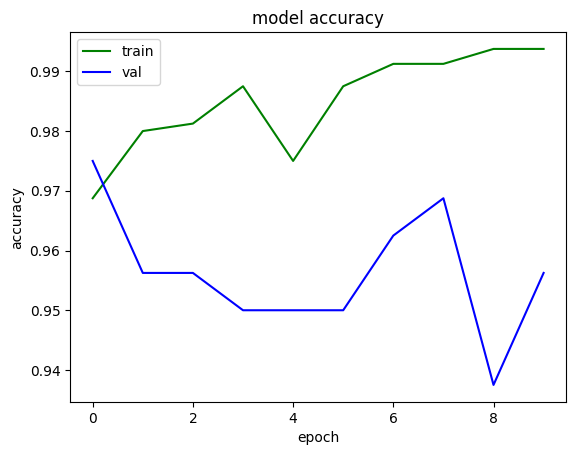

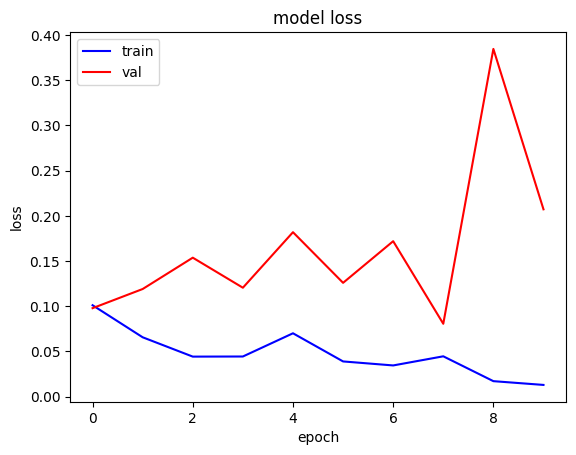

In [18]:
import matplotlib.pyplot as plt

acc = logModel.history['accuracy']
val_acc = logModel.history['val_accuracy']

loss = logModel.history['loss']
val_loss = logModel.history['val_loss']

# Menampilkan Visualisasi log dari accuracy Model Convolutional Neural Network
plt.plot(acc, color='green')
plt.plot(val_acc, color='blue')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Menampilkan Visualisai log dari loss model Convolutional Neural Network
plt.plot(loss, color='blue')
plt.plot(val_loss, color='red')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [28]:
test_loss, test_acc = model.evaluate(validation_generator)

print(f'Test Loss: {test_loss* 100:.2f}%')
print(f'Test Accuracy: {test_acc* 100:.2f}%')

28/28 [==============================] - 10s 349ms/step - loss: 0.1547 - accuracy: 0.9658
Test Loss: 15.47%
Test Accuracy: 96.58%


In [19]:
from keras.callbacks import TensorBoard
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
history = model.fit(train_generator, steps_per_epoch=25, epochs=10, validation_data=validation_generator, callbacks=[tensorboard_callback])

Epoch 1/10
25/25 [==============================] - 30s 1s/step - loss: 0.0417 - accuracy: 0.9837 - val_loss: 0.2270 - val_accuracy: 0.9452
Epoch 2/10
25/25 [==============================] - 29s 1s/step - loss: 0.0260 - accuracy: 0.9912 - val_loss: 0.1858 - val_accuracy: 0.9543
Epoch 3/10
25/25 [==============================] - 29s 1s/step - loss: 0.0123 - accuracy: 0.9950 - val_loss: 0.1880 - val_accuracy: 0.9578
Epoch 4/10
25/25 [==============================] - 25s 1s/step - loss: 0.0127 - accuracy: 0.9950 - val_loss: 0.3319 - val_accuracy: 0.9406
Epoch 5/10
25/25 [==============================] - 24s 976ms/step - loss: 0.0154 - accuracy: 0.9950 - val_loss: 0.2491 - val_accuracy: 0.9589
Epoch 6/10
25/25 [==============================] - 24s 973ms/step - loss: 0.0318 - accuracy: 0.9925 - val_loss: 0.1581 - val_accuracy: 0.9646
Epoch 7/10
25/25 [==============================] - 24s 978ms/step - loss: 0.0389 - accuracy: 0.9775 - val_loss: 0.1776 - val_accuracy: 0.9543
Epoch 8/10


#### Untuk melihat tensorboard bisa dengan menjalankan command dibawah di terminal atau cmd

In [ ]:
tensorboard --logdir logs/fit

# 6. Test Upload Gambar

1/1 [==============================] - 0s 246ms/step
ROCK


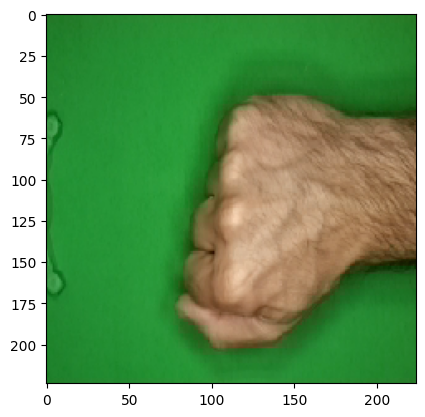

In [23]:
import numpy as np
from keras.preprocessing import image
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
 
# Memprediksi Citra
path = "batu.png"
img = load_img(path, target_size=(224,224))
imgplot = plt.imshow(img)
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
 
images = np.vstack([x])
classes = model.predict(images, batch_size=32)

if classes[0,0]!=0:
  print('PAPER')
elif classes[0,1]!=0:
  print('ROCK')
else:
  print('SCISSORS')
